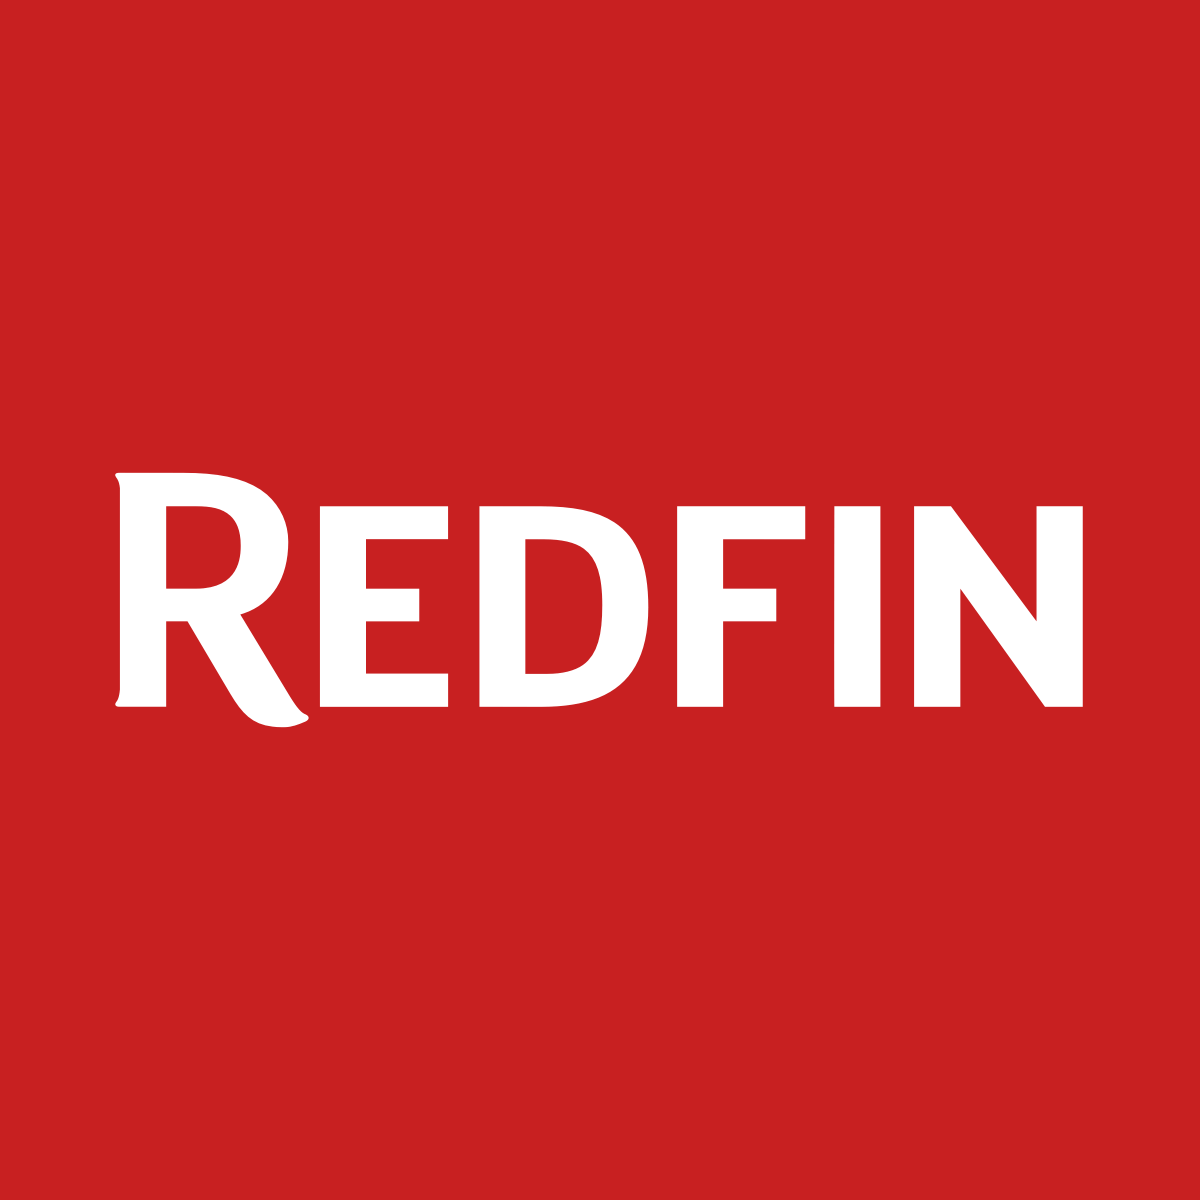

#Real Estate Trends by Team 1
By: Megan Alicea, Chrisoula Manguravdos, Auzma Minhas, Ashley Rodriguez, Chrisoula Manguravdos, Gyalbu Sherpa

#Import necessary libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import csv

#Load the National dataset

In [ ]:
# Load the national dataset
national_df = pd.read_csv("/content/National_Data.csv", encoding = "ISO-8859-1")

Previewing national_df

In [ ]:
# Preview the national df
national_df.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,7/1/2014,7/31/2014,30,national,11,1400,f,National,National,U.S.,...,-0.043866,0.082741,-0.003494,0.024545,0.304037,-0.024518,-0.023836,NaN,NaN,9/10/2023 14:14
1,9/1/2020,9/30/2020,30,national,11,1400,f,National,National,U.S.,...,0.114484,0.115001,-0.008096,-0.090611,0.461406,-0.014994,0.114932,NaN,NaN,9/10/2023 14:14
2,6/1/2023,6/30/2023,30,national,11,1400,t,National,National,U.S.,...,-0.133141,0.147299,-0.006713,-0.005749,0.411936,0.006442,-0.026421,NaN,NaN,9/11/2023 0:00
3,4/1/2017,4/30/2017,30,national,11,1400,t,National,National,U.S.,...,0.031155,0.080793,-0.000110,-0.009665,0.411337,0.000036,0.034341,NaN,NaN,9/11/2023 0:00
4,10/1/2020,10/31/2020,30,national,11,1400,t,National,National,U.S.,...,0.057391,0.106048,-0.002760,-0.013013,0.395823,-0.005410,0.037803,NaN,NaN,9/11/2023 0:00


In [ ]:
# Assess the shape of the df
national_df.shape

(1540, 58)

In [ ]:
# Check the datatype for each column
national_df.dtypes

 period_begin                      object
period_end                         object
period_duration                     int64
region_type                        object
region_type_id                      int64
table_id                            int64
is_seasonally_adjusted             object
region                             object
city                               object
state                              object
state_code                         object
property_type                      object
property_type_id                    int64
median_sale_price                 float64
median_sale_price_mom             float64
median_sale_price_yoy             float64
median_list_price                 float64
median_list_price_mom             float64
median_list_price_yoy             float64
median_ppsf                       float64
median_ppsf_mom                   float64
median_ppsf_yoy                   float64
median_list_ppsf                  float64
median_list_ppsf_mom              

# Cleaning the National Dataset

Removing unnecessary columns for national_df


In [ ]:
# Removing: period_duration, table_id, is_seasonally_adjusted, region, state, city, state_code
national_df = national_df.drop(columns=national_df.columns[2:11])

# Removing: parent_metro_region, parent_metro_region_metro_code, last updated
national_df = national_df.iloc[:, :-3]

# Removing: property_type_id
national_df = national_df.drop(columns=['property_type_id'])

Editing the time information for national_df

In [ ]:
# Removing the 'period_begin' column. Using 'period_end' as the date
national_df = national_df.drop(columns=national_df.columns[0])

# Renaming 'period_end' to 'date'
national_df = national_df.rename(columns={national_df.columns[0]: 'date'})

# Convert the 'date' column to datetime format
national_df['date'] = pd.to_datetime(national_df['date'])

# Create separate columns for month and year
national_df['month'] = national_df['date'].dt.month
national_df['year'] = national_df['date'].dt.year

# Removing the 'date' column
national_df = national_df.drop(columns=national_df.columns[0])

# Moving month and year to the beginning of the df
last_two_columns = national_df.iloc[:, -2:] # Here are the last two columns
national_df = national_df.iloc[:, :-2] # Removing the last two columns from the original DataFrame
national_df = pd.concat([last_two_columns, national_df], axis=1) # Concatenating the last two columns at the beginning

# Sorting the df by 'year' and 'month' so that the data is in chronological order
national_df = national_df.sort_values(by=['month', 'year'])

# Reset the index
national_df = national_df.reset_index(drop=True)

# Defining a dictionary to map numeric month values to month names
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
             7: 'July', 8: 'August', 9: ' September', 10: 'October' , 11: 'November', 12: 'December' }

# Using the map() function to replace numeric values with month names
national_df['month'] = national_df['month'].map(month_map)

Checking for nulls in each column for national_df

In [ ]:
# Checking for nulls in each column
print(national_df.isnull().sum())

month                           0
year                            0
property_type                   0
median_sale_price               0
median_sale_price_mom           5
median_sale_price_yoy          60
median_list_price               0
median_list_price_mom           5
median_list_price_yoy          60
median_ppsf                     0
median_ppsf_mom                 5
median_ppsf_yoy                60
median_list_ppsf                0
median_list_ppsf_mom            5
median_list_ppsf_yoy           60
homes_sold                      0
homes_sold_mom                  5
homes_sold_yoy                 60
pending_sales                   0
pending_sales_mom               5
pending_sales_yoy              60
new_listings                    0
new_listings_mom                5
new_listings_yoy               60
inventory                       0
inventory_mom                   5
inventory_yoy                  60
months_of_supply                0
months_of_supply_mom            5
months_of_supp

Fixing the null values in national_df

In [ ]:
# Defining the list of columns to process
columns_to_process = ['median_sale_price_mom', 'median_sale_price_yoy','median_list_price_mom', 'median_list_price_yoy', 'median_ppsf_mom',
                      'median_ppsf_yoy','median_list_ppsf_mom', 'median_list_ppsf_yoy', 'homes_sold_mom', 'homes_sold_yoy', 'pending_sales_mom',
                      'pending_sales_yoy', 'new_listings_mom', 'new_listings_yoy', 'inventory_mom', 'inventory_yoy', 'months_of_supply_mom',
                      'months_of_supply_yoy', 'median_dom_mom', 'median_dom_yoy', 'avg_sale_to_list_mom', 'avg_sale_to_list_yoy',
                      'sold_above_list_mom', 'sold_above_list_yoy', 'price_drops_mom', 'price_drops_yoy', 'off_market_in_two_weeks_mom',
                      'off_market_in_two_weeks_yoy']

# Getting unique combinations of 'year' and 'property_type'
unique_combinations = national_df[['year', 'property_type']].drop_duplicates()

# Iterating through unique combinations and calculate rolling average for specified columns
for index, row in unique_combinations.iterrows():
    year = row['year']
    prop_type = row['property_type']

    # Filtering the DataFrame for the current year and property type
    subset = national_df[(national_df['year'] == year) & (national_df['property_type'] == prop_type)]

    # Calculating the rolling average for each specified column
    for col in columns_to_process:
        subset[col] = subset[col].fillna(subset[col].mean())

    # Updating the original DataFrame with the calculated values
    national_df.update(subset)


In [ ]:
# No nulls present
print(national_df.isnull().sum())

month                          0
year                           0
property_type                  0
median_sale_price              0
median_sale_price_mom          0
median_sale_price_yoy          0
median_list_price              0
median_list_price_mom          0
median_list_price_yoy          0
median_ppsf                    0
median_ppsf_mom                0
median_ppsf_yoy                0
median_list_ppsf               0
median_list_ppsf_mom           0
median_list_ppsf_yoy           0
homes_sold                     0
homes_sold_mom                 0
homes_sold_yoy                 0
pending_sales                  0
pending_sales_mom              0
pending_sales_yoy              0
new_listings                   0
new_listings_mom               0
new_listings_yoy               0
inventory                      0
inventory_mom                  0
inventory_yoy                  0
months_of_supply               0
months_of_supply_mom           0
months_of_supply_yoy           0
median_dom

Last national_df edits

In [ ]:
# Making sure the year column is an int without decimals
national_df['year'] = national_df['year'].astype(int)

Saving cleaning national data as a csv

In [ ]:
file_path = 'cleaned_national_data.csv'
national_df.to_csv(file_path, index=False)  # Setting index=False to exclude the DataFrame index in the CSV file

# Load the State dataset

In [ ]:
# Load the state dataset
state_df = pd.read_csv("/content/State.csv", encoding = "ISO-8859-1")

Previewing state_df

In [ ]:
# Preview the state df
state_df.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2012-08-01,2012-08-31,30,state,4,33,f,Iowa,NaN,Iowa,...,0.066667,NaN,NaN,NaN,0.000000,0.000000,0.000000,Midwest Region,NaN,2023-09-10 14:22:34
1,2021-02-01,2021-02-28,30,state,4,42,f,Virginia,NaN,Virginia,...,0.227633,0.142857,0.064117,0.060213,0.305455,-0.130319,-0.295264,South Region,NaN,2023-09-10 14:22:34
2,2021-04-01,2021-04-30,30,state,4,49,f,Minnesota,NaN,Minnesota,...,0.156430,0.138517,-0.006933,-0.036480,0.648354,-0.013401,0.214179,Midwest Region,NaN,2023-09-10 14:22:34
3,2015-10-01,2015-10-31,30,state,4,2,f,Missouri,NaN,Missouri,...,0.012556,0.217196,0.001813,0.217111,0.130876,-0.002263,0.108191,Midwest Region,NaN,2023-09-10 14:22:34
4,2014-01-01,2014-01-31,30,state,4,6,f,Nebraska,NaN,Nebraska,...,0.011383,NaN,NaN,NaN,0.378996,0.072626,0.046567,Midwest Region,NaN,2023-09-10 14:22:34


In [ ]:
# Assess the shape of the df
state_df.shape

(33494, 58)

In [ ]:
# Check the datatype for each column
state_df.dtypes

 period_begin                      object
period_end                         object
period_duration                     int64
region_type                        object
region_type_id                      int64
table_id                            int64
is_seasonally_adjusted             object
region                             object
city                              float64
state                              object
state_code                         object
property_type                      object
property_type_id                    int64
median_sale_price                   int64
median_sale_price_mom             float64
median_sale_price_yoy             float64
median_list_price                 float64
median_list_price_mom             float64
median_list_price_yoy             float64
median_ppsf                       float64
median_ppsf_mom                   float64
median_ppsf_yoy                   float64
median_list_ppsf                  float64
median_list_ppsf_mom              

#Cleaning the State Dataset

Removing unnecessary columns for state_df


In [ ]:
# Removing: period_duration, table_id, is_seasonally_adjusted, region
state_df = state_df.drop(columns=state_df.columns[2:8])

# Removing: parent_metro_region_metro_code, last updated
state_df = state_df.iloc[:, :-2]

# Removing: city, property_type_id
state_df = state_df.drop(columns=['property_type_id', 'city'])

In [ ]:
# Renaming 'parent_metro_region' to 'region'
state_df = state_df.rename(columns={'parent_metro_region': 'region'})

#Moving region to the beginning of the df
column_to_move = state_df['region']
state_df = state_df.drop(columns=['region']) # Removing the column from its current position
state_df.insert(4, 'region', column_to_move) # Inserting the column at the desired index position (index 5)

state_df.head()

,period_begin,period_end,state,state_code,region,property_type,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,...,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy
0,2012-08-01,2012-08-31,Iowa,IA,Midwest Region,Multi-Family (2-4 Unit),58500,-0.413926,-0.322830,144500.0,...,0.042340,0.066667,0.066667,0.066667,NaN,NaN,NaN,0.000000,0.000000,0.000000
1,2021-02-01,2021-02-28,Virginia,VA,South Region,Multi-Family (2-4 Unit),225300,-0.142541,0.028184,238800.0,...,0.042807,0.386364,0.159949,0.227633,0.142857,0.064117,0.060213,0.305455,-0.130319,-0.295264
2,2021-04-01,2021-04-30,Minnesota,MN,Midwest Region,All Residential,308300,0.018894,0.102400,310700.0,...,0.025852,0.563874,0.055545,0.156430,0.138517,-0.006933,-0.036480,0.648354,-0.013401,0.214179
3,2015-10-01,2015-10-31,Missouri,MO,Midwest Region,Single Family Residential,154600,0.005626,0.071962,148700.0,...,0.003054,0.140295,-0.010553,0.012556,0.217196,0.001813,0.217111,0.130876,-0.002263,0.108191
4,2014-01-01,2014-01-31,Nebraska,NE,Midwest Region,All Residential,135100,-0.069527,-0.009897,147300.0,...,-0.000474,0.169948,-0.016892,0.011383,NaN,NaN,NaN,0.378996,0.072626,0.046567


Editing the time information for state_df

In [ ]:
# Removing the 'period_begin' column. Using 'period_end' as the date
state_df = state_df.drop(columns=state_df.columns[0])

# Renaming 'period_end' to 'date'
state_df = state_df.rename(columns={state_df.columns[0]: 'date'})

# Convert the 'date' column to datetime format
state_df['date'] = pd.to_datetime(state_df['date'])

# Create separate columns for month and year
state_df['month'] = state_df['date'].dt.month
state_df['year'] = state_df['date'].dt.year

# Removing the 'date' column
state_df = state_df.drop(columns=state_df.columns[0])

# Moving month and year to the beginning of the df
state_last_two_columns = state_df.iloc[:, -2:] # Here are the last two columns
state_df = state_df.iloc[:, :-2] # Removing the last two columns from the original DataFrame
state_df = pd.concat([state_last_two_columns, state_df], axis=1) # Concatenating the last two columns at the beginning

# Sorting the df by 'year' and 'month' so that the data is in chronological order
state_df = state_df.sort_values(by=['month', 'year'])

# Reset the index
state_df = state_df.reset_index(drop=True)

# Using the map() function from previously to replace numeric values with month names
state_df['month'] = state_df['month'].map(month_map)

Checking for nulls for state_df

In [ ]:
# Checking for nulls in each column
print(state_df.isnull().sum())

month                             0
year                              0
state                             0
state_code                        0
region                            0
property_type                     0
median_sale_price                 0
median_sale_price_mom             0
median_sale_price_yoy             0
median_list_price               152
median_list_price_mom           220
median_list_price_yoy           251
median_ppsf                     166
median_ppsf_mom                  23
median_ppsf_yoy                  26
median_list_ppsf                152
median_list_ppsf_mom            220
median_list_ppsf_yoy            251
homes_sold                        0
homes_sold_mom                    0
homes_sold_yoy                    0
pending_sales                   419
pending_sales_mom               613
pending_sales_yoy               683
new_listings                    152
new_listings_mom                220
new_listings_yoy                251
inventory                   

Fixing the null values in state_df


In [ ]:
# Grouping by 'month', 'year', and 'property_type', to calculate the average for that period, and replace nulls for applicable columns
# Defining the list of columns to process
columns_to_process = ['median_list_price', 'median_ppsf', 'median_list_ppsf', 'pending_sales', 'new_listings', 'inventory', 'months_of_supply',
                      'median_dom', 'avg_sale_to_list','sold_above_list', 'price_drops', 'off_market_in_two_weeks']

for col in columns_to_process:
    state_df[col] = state_df.groupby(['month', 'year', 'property_type'])[col].transform(lambda x: x.fillna(x.mean()))


# Doing the same process for month over month and year over year columns
columns_to_process = ['median_sale_price_mom', 'median_sale_price_yoy','median_list_price_mom', 'median_list_price_yoy', 'median_ppsf_mom',
                      'median_ppsf_yoy','median_list_ppsf_mom', 'median_list_ppsf_yoy', 'homes_sold_mom', 'homes_sold_yoy', 'pending_sales_mom',
                      'pending_sales_yoy', 'new_listings_mom', 'new_listings_yoy', 'inventory_mom', 'inventory_yoy', 'months_of_supply_mom',
                      'months_of_supply_yoy', 'median_dom_mom', 'median_dom_yoy', 'avg_sale_to_list_mom', 'avg_sale_to_list_yoy',
                      'sold_above_list_mom', 'sold_above_list_yoy', 'price_drops_mom', 'price_drops_yoy', 'off_market_in_two_weeks_mom',
                      'off_market_in_two_weeks_yoy']

# Getting unique combinations of 'year' and 'property_type'
unique_combinations = state_df[['year', 'property_type']].drop_duplicates()

# Iterating through unique combinations and calculate rolling average for specified columns
for index, row in unique_combinations.iterrows():
    year = row['year']
    prop_type = row['property_type']

    # Filtering the DataFrame for the current year and property type
    subset_state = state_df[(state_df['year'] == year) & (state_df['property_type'] == prop_type)]

    # Calculating the rolling average for each specified column
    for col in columns_to_process:
        subset_state[col] = subset_state[col].fillna(subset_state[col].mean())

    # Updating the original DataFrame with the calculated values
    state_df.update(subset_state)


<ipython-input-21-aeebbb10bf89>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_state[col] = subset_state[col].fillna(subset_state[col].mean())
<ipython-input-21-aeebbb10bf89>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_state[col] = subset_state[col].fillna(subset_state[col].mean())
<ipython-input-21-aeebbb10bf89>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
# Checking for nulls in each column
print(state_df.isnull().sum())

month                          0
year                           0
state                          0
state_code                     0
region                         0
property_type                  0
median_sale_price              0
median_sale_price_mom          0
median_sale_price_yoy          0
median_list_price              0
median_list_price_mom          0
median_list_price_yoy          0
median_ppsf                    0
median_ppsf_mom                0
median_ppsf_yoy                0
median_list_ppsf               0
median_list_ppsf_mom           0
median_list_ppsf_yoy           0
homes_sold                     0
homes_sold_mom                 0
homes_sold_yoy                 0
pending_sales                  0
pending_sales_mom              0
pending_sales_yoy              0
new_listings                   0
new_listings_mom               0
new_listings_yoy               0
inventory                      0
inventory_mom                  0
inventory_yoy                  0
months_of_

Final state_df edits

In [ ]:
# Making sure year is one int without decimals
state_df['year'] = state_df['year'].astype(int)

Saving cleaned state data as a csv

In [ ]:
file_path = 'cleaned_state_data.csv'
state_df.to_csv(file_path, index=False)  # Setting index=False to exclude the DataFrame index in the CSV file

# Extracting NY data from State dataset

In [ ]:
ny_df = state_df[state_df['state'] == 'New York']
ny_df.head()

,month,year,state,state_code,region,property_type,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,...,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy
67,January,2012,New York,NY,Northeast Region,Multi-Family (2-4 Unit),98600.0,-0.027667,-0.033381,187800.0,...,-0.024822,0.091667,-0.002083,-0.032333,0.021661,0.009201,-0.007883,0.107396,0.026113,-0.000115
81,January,2012,New York,NY,Northeast Region,Single Family Residential,205200.0,0.032151,-0.048841,236700.0,...,0.000777,0.109976,-0.003626,-0.001886,0.050805,0.018187,-0.012193,0.131266,0.027783,0.019282
133,January,2012,New York,NY,Northeast Region,All Residential,200300.0,0.032511,-0.045774,238700.0,...,-0.000667,0.106589,-0.002206,-0.001031,0.052996,0.019104,-0.010805,0.135862,0.034703,0.022262
148,January,2012,New York,NY,Northeast Region,Condo/Co-op,223000.0,0.007981,-0.134622,334800.0,...,-0.000918,0.065217,0.000701,0.015466,0.145125,0.051039,0.014341,0.201520,0.118608,0.081462
154,January,2012,New York,NY,Northeast Region,Townhouse,168000.0,-0.091064,-0.077507,173700.0,...,0.003303,0.120370,0.039289,0.053704,0.011536,0.003593,-0.004842,0.163717,0.040600,0.091336


In [ ]:
file_path = 'cleaned_ny_data.csv'
ny_df.to_csv(file_path, index=False)  # Setting index=False to exclude the DataFrame index in the CSV file

# Visualizations using National Data

Price Drops Throughout Nation (Bar Chart)

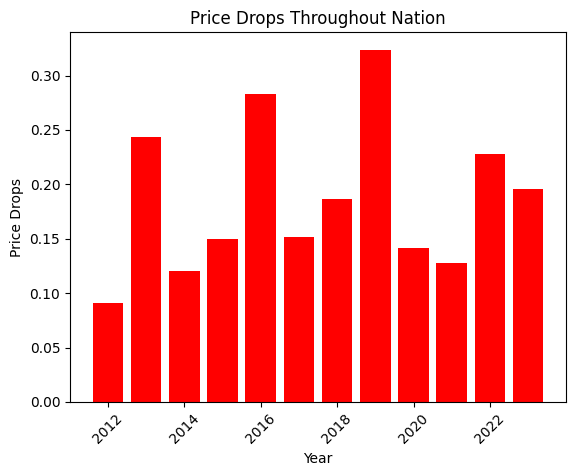

In [ ]:
X = list(national_df.iloc[:, 1])
Y = list(national_df.iloc[:, 39])

# Plot the data using bar() method
plt.bar(X, Y, color='r')
plt.title("Price Drops Throughout Nation")
plt.xlabel("Year")
plt.ylabel("Price Drops")
plt.xticks(rotation =45)

# Show the plot
plt.show()

Homes Sold Per Year Nationally (Bar Chart)

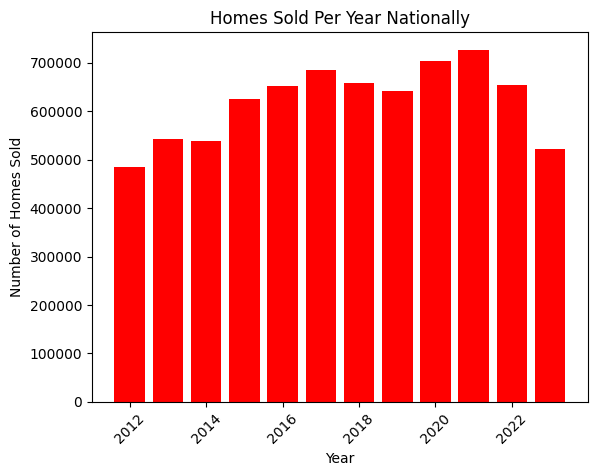

In [ ]:
X = list(national_df.iloc[:, 1])
Y = list(national_df.iloc[:, 15])

# Plot the data using bar() method
plt.bar(X, Y, color='r')
plt.title("Homes Sold Per Year Nationally")
plt.xlabel("Year")
plt.ylabel("Number of Homes Sold")
plt.xticks(rotation =45)


# Show the plot
plt.show()

#Visualizations using State Data

Median Sale Price by State (Bar Chart)

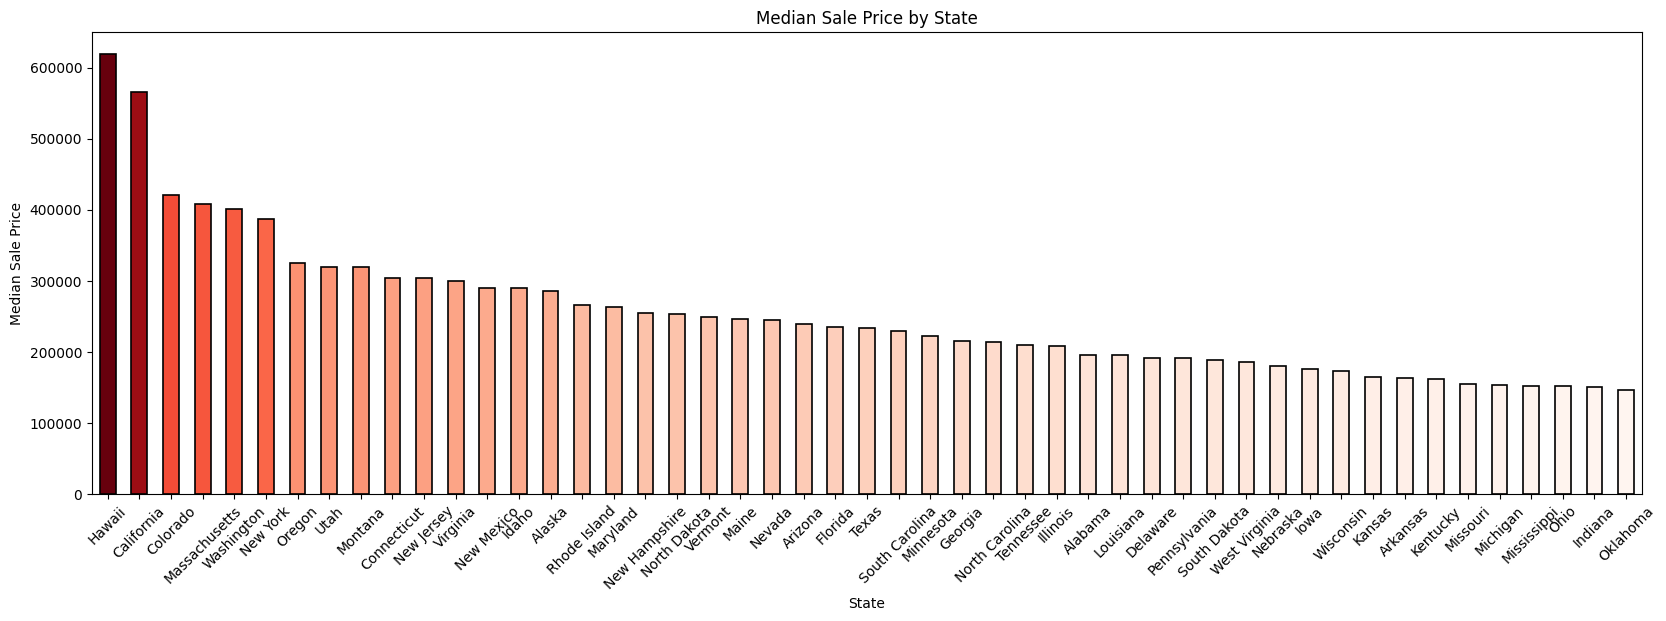

In [ ]:
# Removing Washington DC from this visual
df_without_columbia = state_df[state_df['state'] != 'Columbia']

# Creating a bar chart for the remaining states with a green colormap and borders
plt.figure(figsize=(20, 6))
state_median_price = df_without_columbia.groupby('state')['median_sale_price'].mean().sort_values(ascending=False)

# Creating a colormap
cmap = plt.get_cmap('Reds')

# Normalizing the median sale prices to map them to the green colormap
normalized_prices = (state_median_price - state_median_price.min()) / (state_median_price.max() - state_median_price.min())

# Creating a color for each bar based on the normalized median sale price
colors = [cmap(norm_price) for norm_price in normalized_prices]

# Creating the bar chart with gradient green colors and borders
state_median_price.plot(kind='bar', color=colors, edgecolor='black', linewidth=1.2)
plt.title('Median Sale Price by State')
plt.xlabel('State')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=45)
plt.show()


Top 10 Median Sale Price by State (Pie Chart)

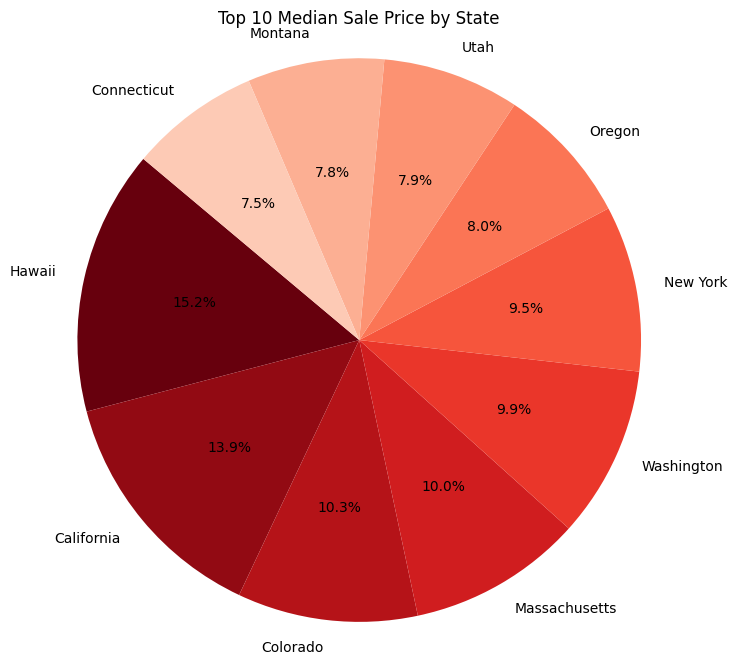

In [ ]:
# Calculate the mean median sale price for each state
state_median_price = df_without_columbia.groupby('state')['median_sale_price'].mean().sort_values(ascending=False)

# Select the top 10 states
top_10_states = state_median_price.head(10)

colors = plt.cm.Reds(np.linspace(1, .2, len(top_10_states)))

# Create a pie chart for the top 10 states
plt.figure(figsize=(8, 8))
plt.pie(top_10_states, labels=top_10_states.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 10 Median Sale Price by State')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Median Sale Price Distribution in New York

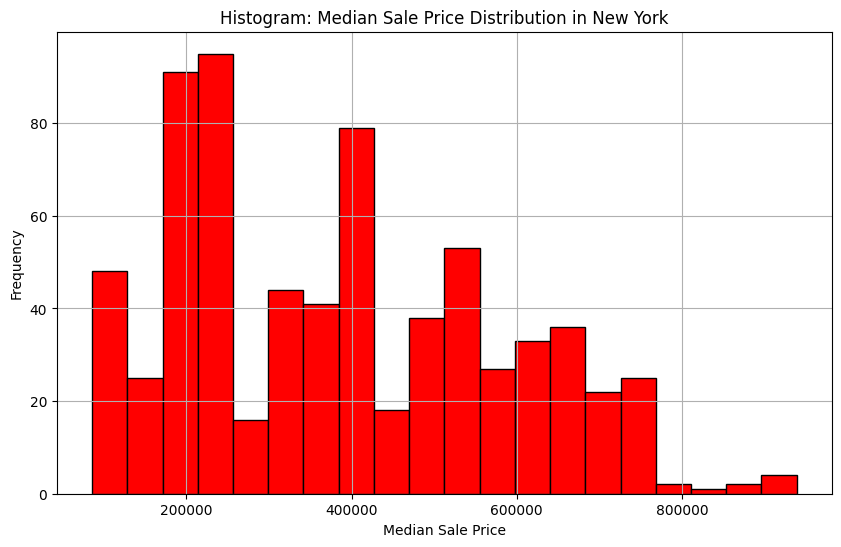

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(ny_df['median_sale_price'], bins=20, edgecolor='k', color='red')
plt.title('Histogram: Median Sale Price Distribution in New York')
plt.xlabel('Median Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()